In [1]:
# Final Project

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# IMporting Libraries
import numpy as np
import pandas as pd
import random as rd

In [4]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

In [5]:
# for Cnn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# train images data
train=pd.read_csv('sign_mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
# test images data
test=pd.read_csv('sign_mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
# for missing data
print(sum(train.isna().sum()))
print(sum(test.isna().sum()))

0
0


In [9]:
y_train=train['label']
X_train=train.drop(labels=['label'],axis=1)

In [10]:
y_test=test['label']
X_test=test.drop(labels=['label'],axis=1)

In [11]:
# grayscale
X_train=X_train/255.0
X_test=X_test/255.0

In [12]:
# for(reshapeing)
X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)

In [13]:
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [14]:
# visualization of labels  train
fig=px.histogram(train,
                 x='label',
                 color='label'
                 )

In [15]:
fig=px.histogram(test,
                 x='label',
                 color='label'
                 )


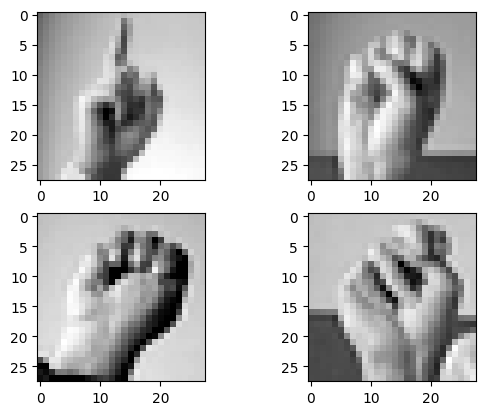

In [16]:
fig,axe=plt.subplots(2,2)
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')

axe[0,1].imshow(X_train[10].reshape(28,28),cmap='gray')

axe[1,0].imshow(X_train[100].reshape(28,28),cmap='gray')

axe[1,1].imshow(X_train[1000].reshape(28,28),cmap='gray')

# traing images at indexs 0,10,100,1000

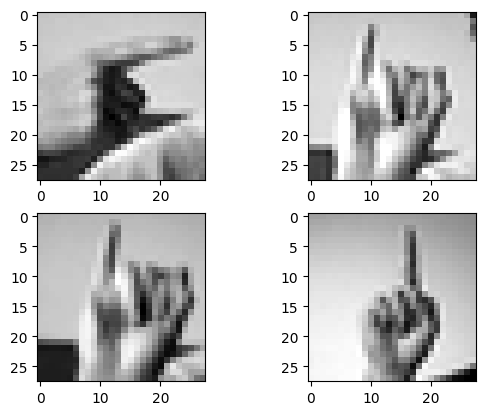

In [17]:
fig,axe=plt.subplots(2,2)
axe[0,0].imshow(X_test[0].reshape(28,28),cmap='gray')

axe[0,1].imshow(X_test[10].reshape(28,28),cmap='gray')

axe[1,0].imshow(X_test[100].reshape(28,28),cmap='gray')

axe[1,1].imshow(X_test[1000].reshape(28,28),cmap='gray')

# test images at 0,10,100,1000

In [18]:
# CNN model

In [28]:
# # spliting training images into the images
# X_train, X_t, y_train, y_t = train_test_split(X_train, y_train, test_size = 0.3, random_state=7)

In [29]:
print(X_train.shape)
print(y_train.shape)
# print(X_t.shape)
# print(y_t.shape)
print(X_test.shape)
print(y_test.shape)

(19218, 28, 28, 1)
(19218,)
(7172, 28, 28, 1)
(7172,)


In [30]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout

In [31]:
model = keras.Sequential([

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [32]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
final = model.fit(
    x = X_train,
    y = y_train,
    validation_data= (X_test,y_test),
    batch_size = 128,
    epochs=20,
    verbose=2,
)

Epoch 1/20
151/151 - 23s - loss: 3.2601 - accuracy: 0.0686 - val_loss: 3.2569 - val_accuracy: 0.0501 - 23s/epoch - 150ms/step
Epoch 2/20
151/151 - 16s - loss: 2.5742 - accuracy: 0.2143 - val_loss: 3.1953 - val_accuracy: 0.0640 - 16s/epoch - 108ms/step
Epoch 3/20
151/151 - 17s - loss: 1.6742 - accuracy: 0.4420 - val_loss: 1.6755 - val_accuracy: 0.3850 - 17s/epoch - 110ms/step
Epoch 4/20
151/151 - 16s - loss: 1.0762 - accuracy: 0.6236 - val_loss: 0.8913 - val_accuracy: 0.6995 - 16s/epoch - 108ms/step
Epoch 5/20
151/151 - 15s - loss: 0.7577 - accuracy: 0.7309 - val_loss: 0.5118 - val_accuracy: 0.8337 - 15s/epoch - 98ms/step
Epoch 6/20
151/151 - 10s - loss: 0.5525 - accuracy: 0.8082 - val_loss: 0.3653 - val_accuracy: 0.8829 - 10s/epoch - 66ms/step
Epoch 7/20
151/151 - 10s - loss: 0.4333 - accuracy: 0.8483 - val_loss: 0.2537 - val_accuracy: 0.9149 - 10s/epoch - 65ms/step
Epoch 8/20
151/151 - 10s - loss: 0.3395 - accuracy: 0.8803 - val_loss: 0.1990 - val_accuracy: 0.9392 - 10s/epoch - 67ms/s

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                        

In [ ]:
model.save_weights("model_weights.h5")
# Saving the model
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved weifhts saved')
# classifier.save_weights('model-bw.weights.h5')
# print('Weights saved')

Model Saved weifhts saved
